In [1]:
# Import pustaka yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

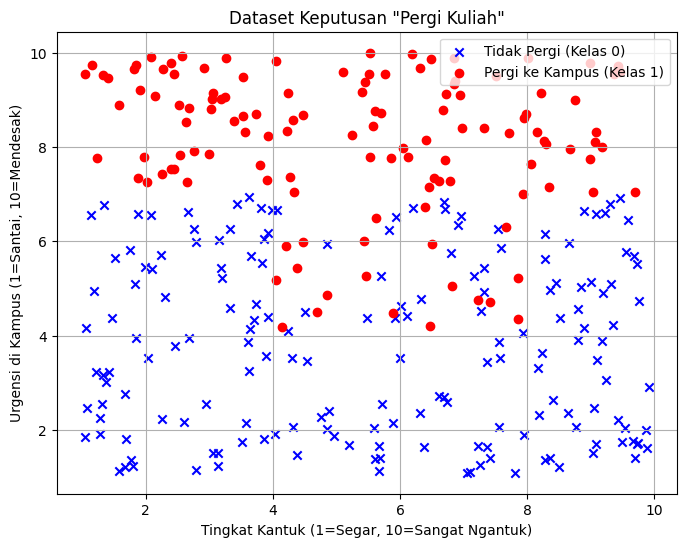

In [2]:
# %%
# membuat data simulasi "pergi kuliah"
np.random.seed(42)  # ini untuk memastikan data acak yang dihasilkan selalu sama

# 1. membuat data acak untuk sumbu x (kantuk) dan y (urgensi)
jumlah_data = 300
tingkat_kantuk = np.random.uniform(1, 10, jumlah_data)
urgensi_kampus = np.random.uniform(1, 10, jumlah_data)

# 2. menentukan aturan logis untuk keputusan (1 = pergi, 0 = tidak)
keputusan = np.zeros(jumlah_data, dtype=int)

# aturan 1: jika urgensi tinggi, pasti pergi (misal: ujian)
keputusan[urgensi_kampus > 7] = 1

# aturan 2: jika sangat mengantuk tapi tidak urgen, pasti tidak pergi
keputusan[(tingkat_kantuk > 8) & (urgensi_kampus < 4)] = 0

# aturan 3: ini adalah 'area galau' di tengah, hasilnya kita acak
area_abu_abu = (urgensi_kampus >= 4) & (urgensi_kampus <= 7) & (tingkat_kantuk >= 4) & (tingkat_kantuk <= 8)
keputusan[area_abu_abu] = np.random.randint(0, 2, size=np.sum(area_abu_abu))

# menggabungkan data fitur (x) dan target (y)
X = np.c_[tingkat_kantuk, urgensi_kampus]
y = keputusan

# 3. menampilkan data kita dalam bentuk scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='x', label='Tidak Pergi (Kelas 0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='o', label='Pergi ke Kampus (Kelas 1)')
plt.title('Dataset Keputusan "Pergi Kuliah"')
plt.xlabel('Tingkat Kantuk (1=Segar, 10=Sangat Ngantuk)')
plt.ylabel('Urgensi di Kampus (1=Santai, 10=Mendesak)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# %%
# ini adalah fungsi pembantu untuk menggambar 'peta keputusan'
def plot_decision_boundary(clf, X, y, title):
    h = .1  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA']) 
    cmap_bold = ListedColormap(['#0000FF', '#FF0000'])  

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Tingkat Kantuk (1=Segar, 10=Sangat Ngantuk)')
    plt.ylabel('Urgensi di Kampus (1=Santai, 10=Mendesak)')
    plt.show()

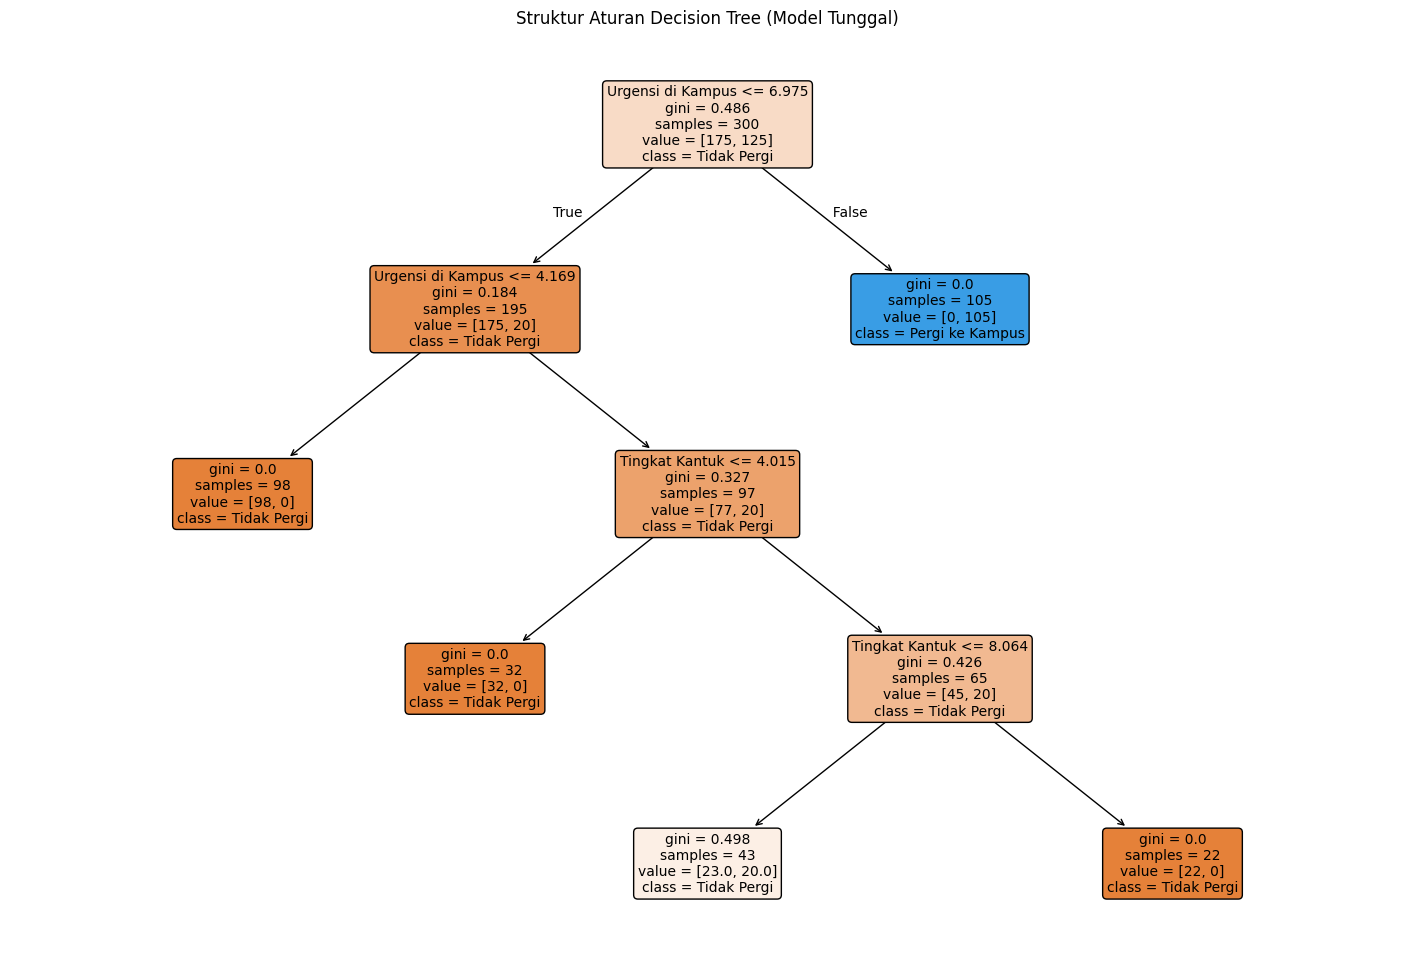

In [4]:
# %%
# 1. melatih model decision tree
# kita batasi kedalamannya (max_depth=4) agar pohonnya tidak terlalu besar
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X, y)

# 2. memvisualisasikan struktur pohon (flowchart aturan)
plt.figure(figsize=(18, 12))
plot_tree(dt_clf, 
          filled=True, 
          feature_names=['Tingkat Kantuk', 'Urgensi di Kampus'], 
          class_names=['Tidak Pergi', 'Pergi ke Kampus'], 
          rounded=True,
          fontsize=10)
plt.title('Struktur Aturan Decision Tree (Model Tunggal)')
plt.show()

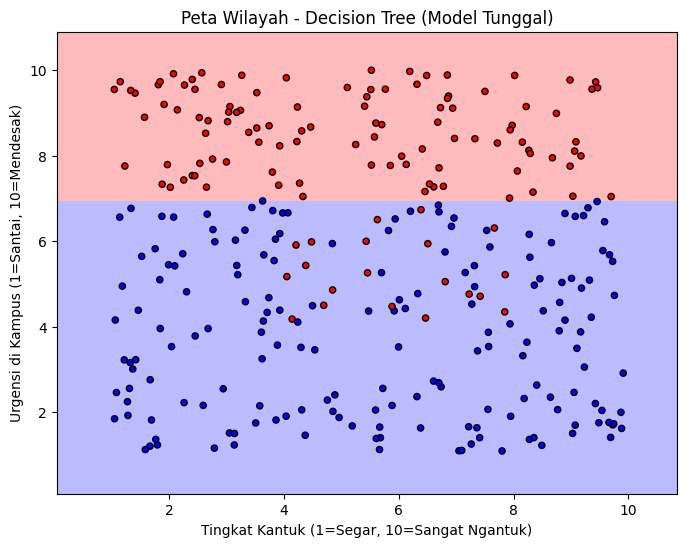

In [5]:
# %%
# memvisualisasikan peta keputusan yang dibuat oleh decision tree
plot_decision_boundary(dt_clf, X, y, 'Peta Wilayah - Decision Tree (Model Tunggal)')

In [6]:
# %%
# 1. melatih model random forest
# n_estimators=100 artinya kita membangun 100 pohon keputusan
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

# 2. melatih modelnya
rf_clf.fit(X, y)

# kita tidak perlu output di sini, hanya konfirmasi pelatihan
print("Model Random Forest (100 Pohon) sudah dilatih.")

Model Random Forest (100 Pohon) sudah dilatih.


Menampilkan 4 Pohon Pertama dari Total 100 Pohon di Random Forest:
Perhatikan bagaimana struktur dan aturan setiap pohon BERBEDA!


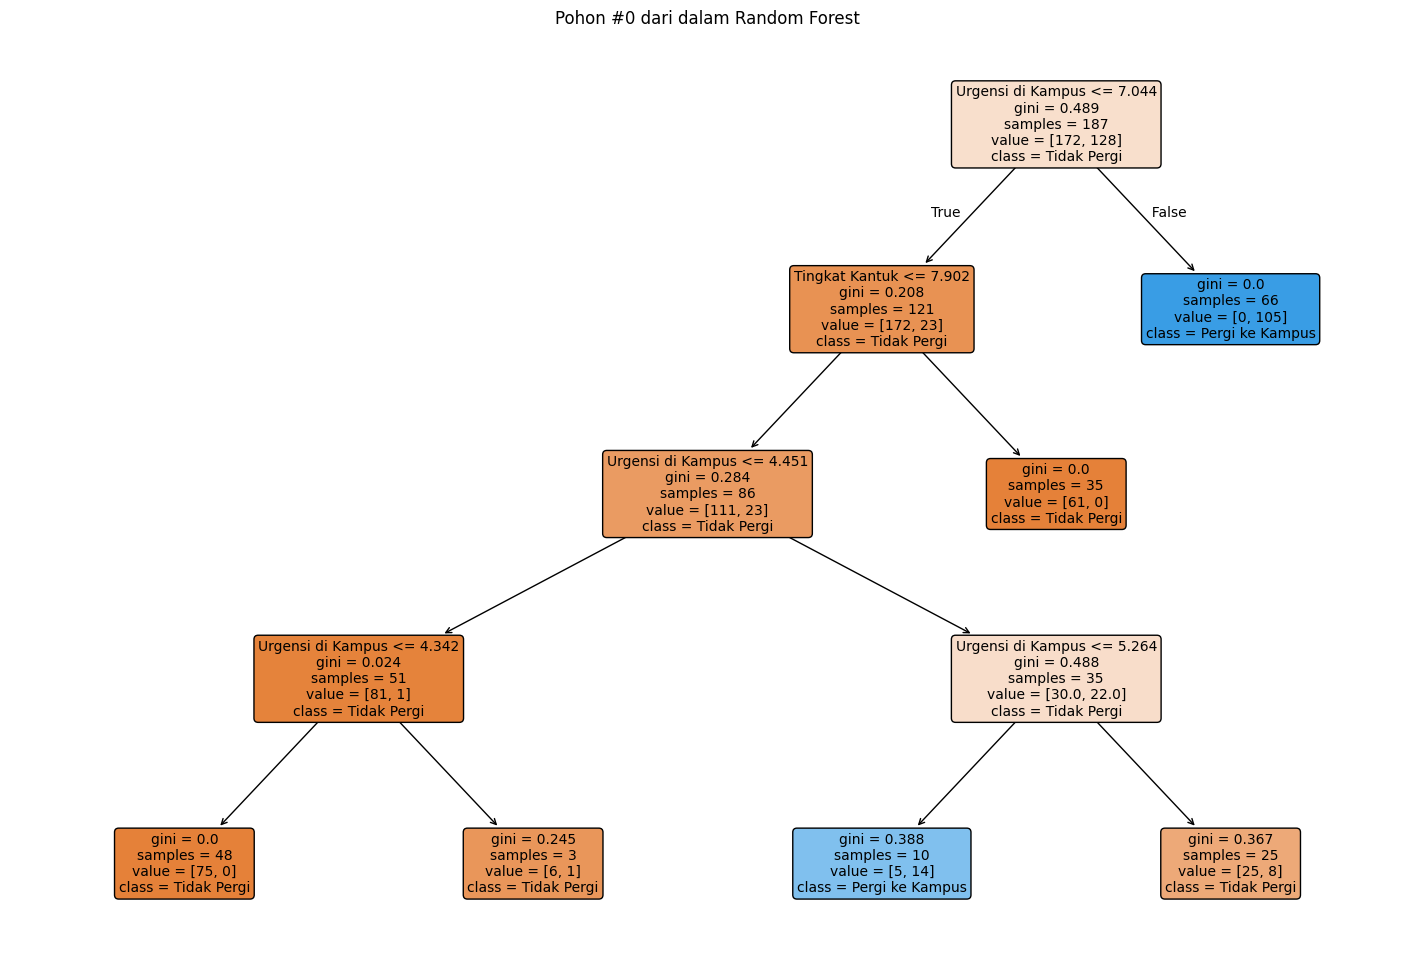

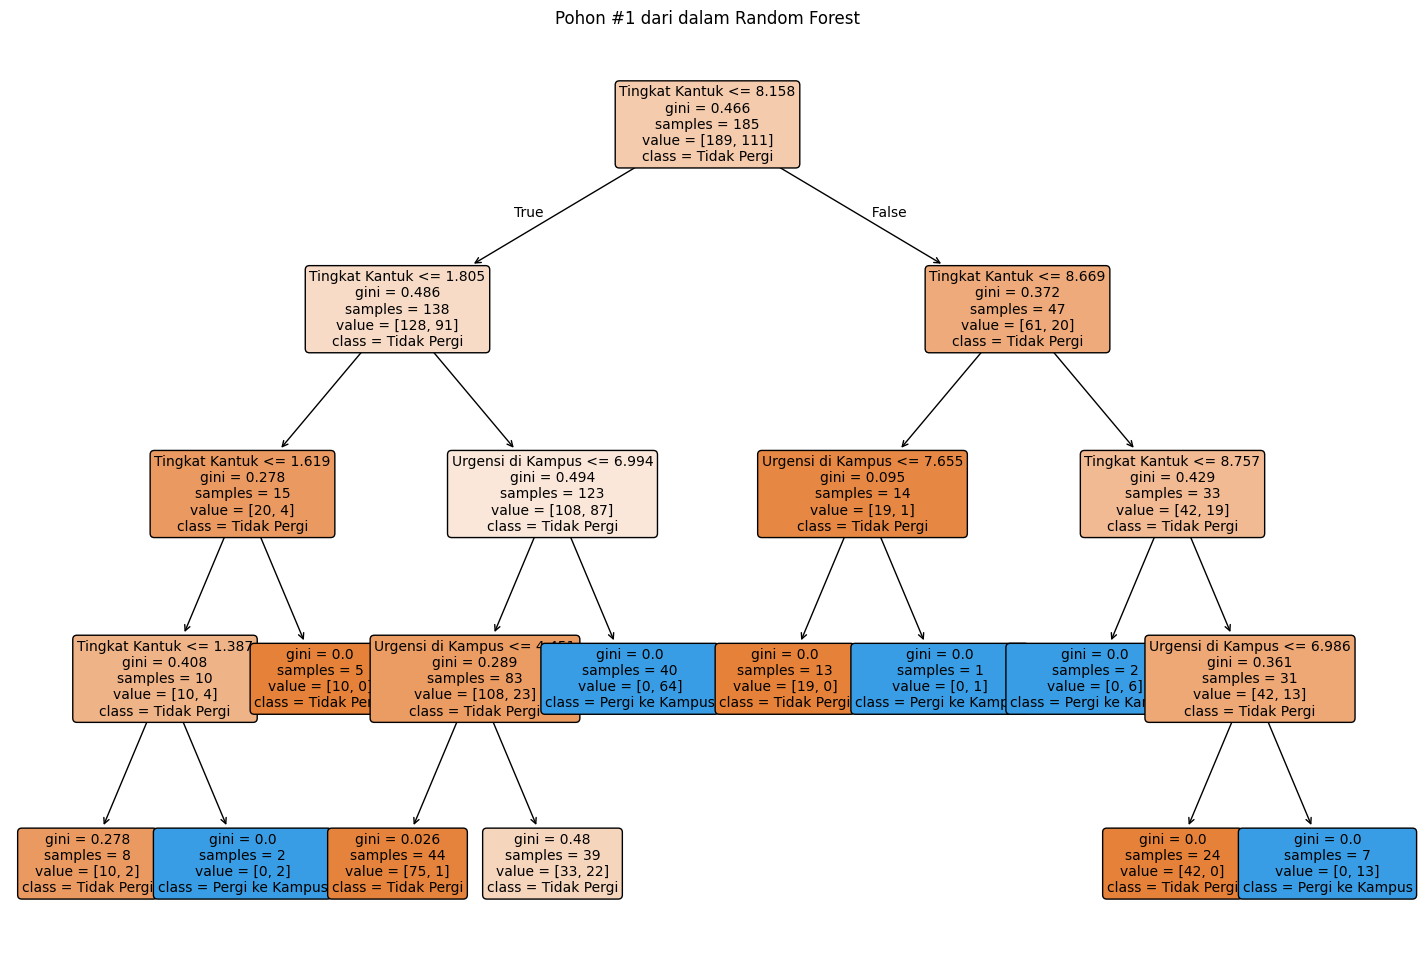

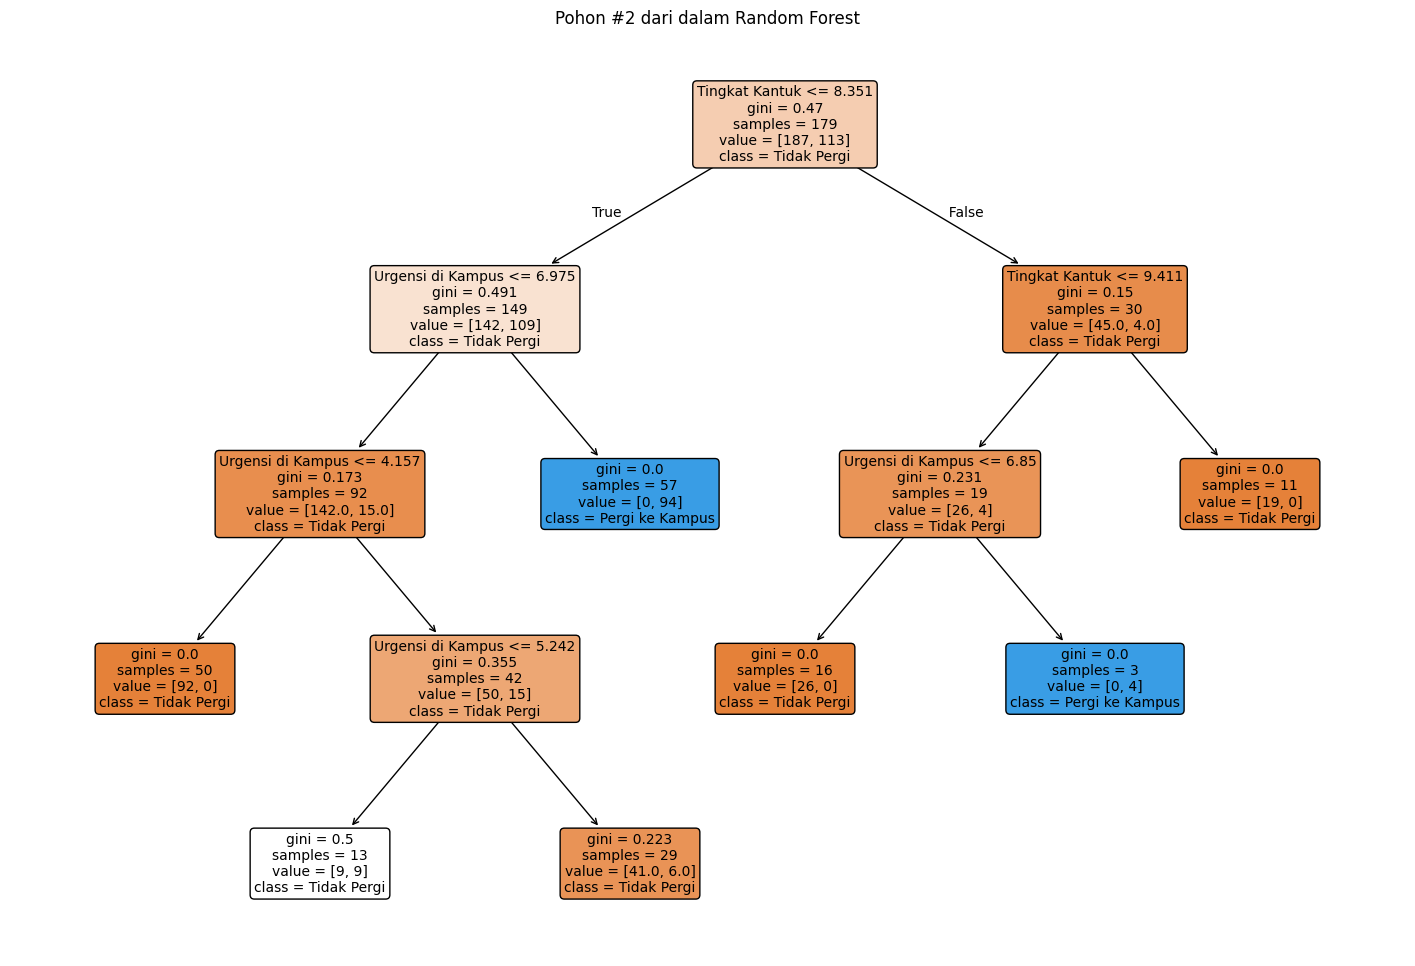

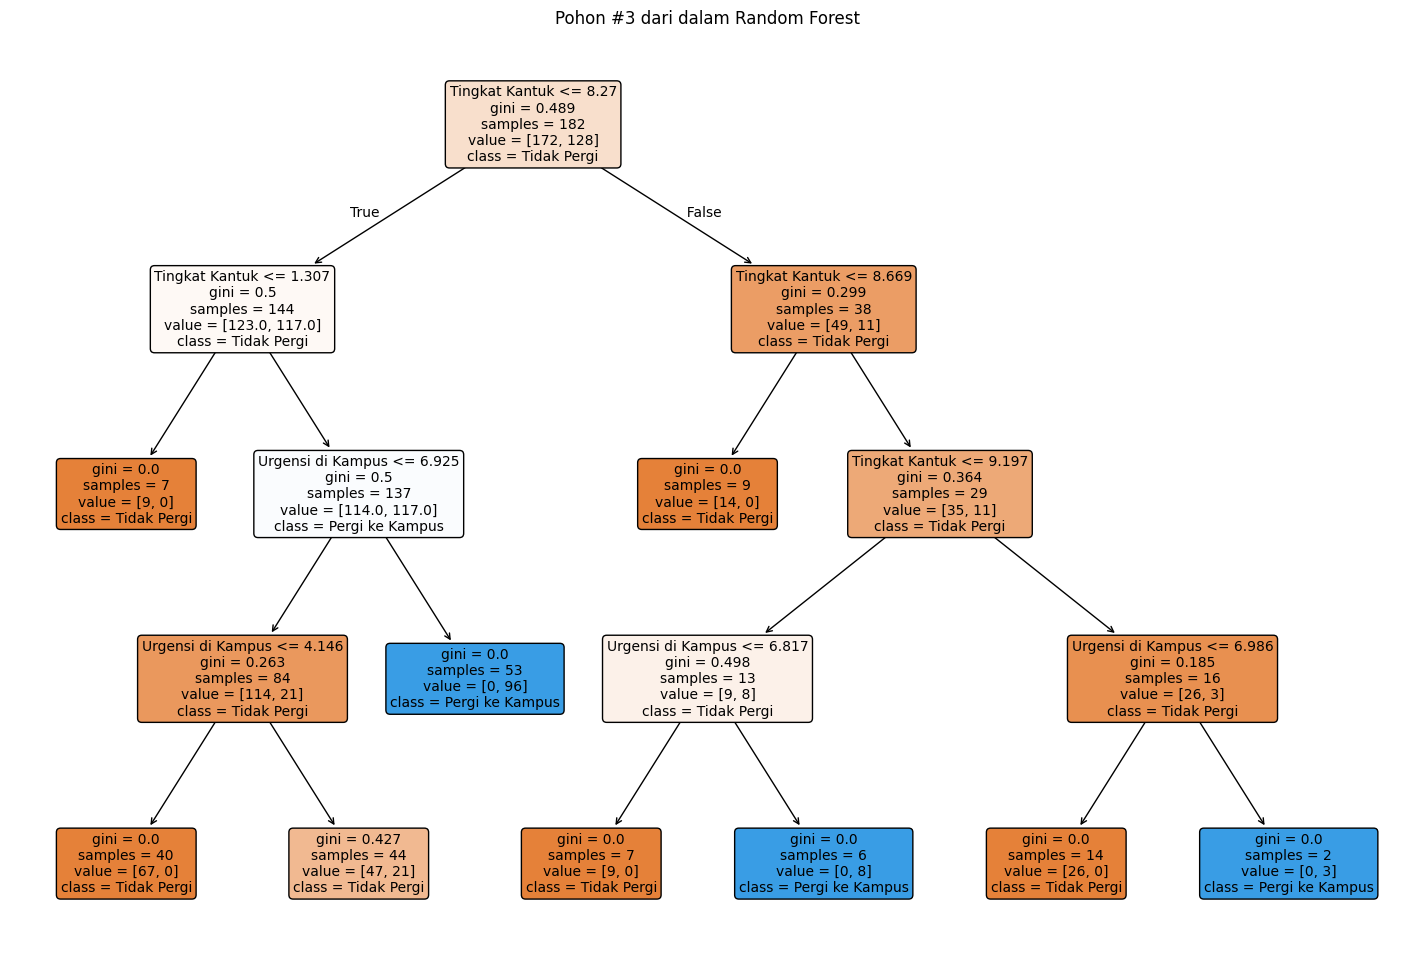

In [7]:
# %%
# menginspeksi beberapa pohon individu di dalam random forest
# ini untuk menunjukkan bahwa setiap pohon di dalamnya memang berbeda

jumlah_pohon_untuk_ditampilkan = 4

print(f"Menampilkan {jumlah_pohon_untuk_ditampilkan} Pohon Pertama dari Total 100 Pohon di Random Forest:")
print("Perhatikan bagaimana struktur dan aturan setiap pohon BERBEDA!")

# perulangan (loop) untuk mengambil dan menggambar 4 pohon pertama
for i in range(jumlah_pohon_untuk_ditampilkan):
    pohon = rf_clf.estimators_[i]
    
    plt.figure(figsize=(18, 12))
    plot_tree(pohon, 
              filled=True, 
              feature_names=['Tingkat Kantuk', 'Urgensi di Kampus'], 
              class_names=['Tidak Pergi', 'Pergi ke Kampus'], 
              rounded=True,
              fontsize=10)
    plt.title(f'Pohon #{i} dari dalam Random Forest')
    plt.show()

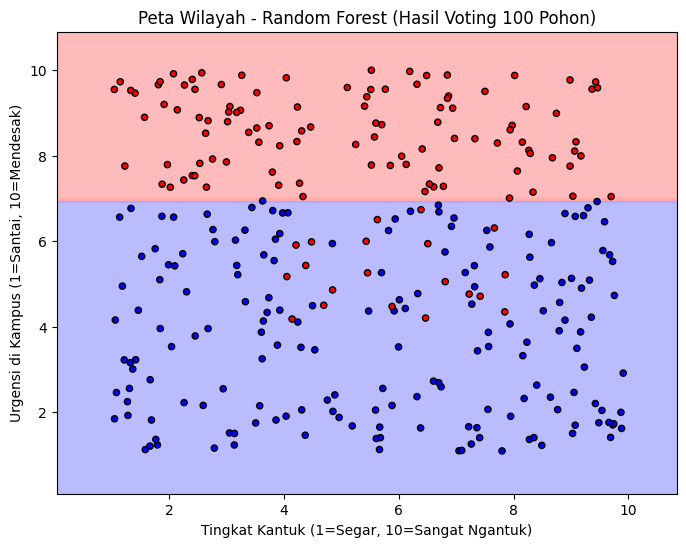

In [8]:
# %%
# memvisualisasikan peta keputusan gabungan (hasil voting) dari random forest
plot_decision_boundary(rf_clf, X, y, 'Peta Wilayah - Random Forest (Hasil Voting 100 Pohon)')